#Obteniendo datos desde archivo CSV



In [71]:
# ensure some dependencies are available
# ! pip install pyjanitor==0.20.10

In [4]:
# datos
GENERAL_PATH = '/content/drive/MyDrive/IIMAS/Inteligencia_Artificial/Proyecto_Final/DecisionTree/'
# PATH_CSV     = GENERAL_PATH + 'celulares.csv'

# PATH_CSV solo esta disponible para el usuario que creo el colab, a mí (Alberto Jaimes) me aparece como path no disponible; subí los datos (en su versión al 2021-01-09) a github, la url es la siguiente
PATH_CSV = 'https://raw.githubusercontent.com/yoselalberto/ia_proyecto_final/main/data/celulares.csv'

In [5]:
# dependencias
import pandas as pd 
import os
import re

In [103]:
# Functions
def load_data(path = PATH_CSV):
  # load the dataframe, setting all columns to string type  
  csv_path = os.path.join(path)
  return pd.read_csv(csv_path, dtype = str)
  

# corrigé un error en el formato de los valores de cada instancia
def df_csv(dataframe, string = ','):
  # elimina el caracter molesto
  df = dataframe.copy()
  # column by column
  for columna in df.columns.values:
    df[columna] = df[columna].str.replace(string, '')
  return df 
# lowercase all dataframe
def df_lowercase(dataframe):
  # lowercase all columns
  df = dataframe.copy()
  for columna in df.columns.values:
    df[columna] = df[columna].str.lower()
  return df
# coerse columns
def df_numeric(dataframe, columns):
  df = dataframe.copy()
  df[columns] = df[columns].apply(pd.to_numeric, errors='coerce')
  return df
# agrupo las funciones anteriores
def df_clean(dataframe, string, columns_to_numeric):
  df = dataframe.copy()
  # 
  df_2 = df_csv(dataframe, string)
  df_3 = df_lowercase(df_2)
  df_4 = df_numeric(df_3, columns = columns_to_numeric)
  return df_4

In [100]:
# explicitly load the data
tabla_inicio = pd.read_csv(path_csv, dtype = str)

In [101]:
# renombramiento de columnas
nombres = {"Marca": 'marca', "Nombre del Producto": 'nombre_producto', "Color": 'color', "Peso": 'peso', "Pantalla": 'pantalla', "Cámara trasera": 'camara_trasera', "Cámara frontal": 'camara_delantera',
           "Procesador": 'procesador', "RAM":	'ram', "Memoria Interna": 'memoria', "Sistema Operativo": 'so', "Tecnología": 'tecnologia', "Precio": 'precio', "Gama": 'clases'}
#
tabla_nombres = tabla_inicio.rename(columns = nombres)

In [106]:
columns_numeric = ['peso', 'camara_trasera', 'camara_delantera', 'ram', 'memoria', 'precio']
# 
tabla_limpia = df_clean(tabla_nombres, ',', columns_numeric )

In [108]:
tabla_limpia

,marca,nombre_producto,color,peso,pantalla,camara_trasera,camara_delantera,procesador,ram,memoria,so,tecnologia,precio
0,samsung,galaxy z fold2,negro,0.282,amoled,12,10,qualcomm1,12,256,android 10,2g/3g/4g/4glte/5g,46799
1,samsung,galaxy z fold2,bronce,0.282,amoled,12,10,qualcomm1,12,256,android 10,2g/3g/4g/4glte/5g,46799
2,apple,iphone 11 pro max,verde medianoche,0.272,oled,12,12,apple1,4,512,apple ios 13,4glte,33999
3,apple,iphone 11 pro max,gris espacial,0.272,oled,12,12,apple1,4,512,apple ios 13,4glte,33999
4,apple,iphone 11 pro max,plata,0.272,oled,12,12,apple1,4,512,apple ios 13,4glte,33999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,motorola,moto g8 play,gris,0.188,tft-lcd,8,13,mediatek2,2,32,android 9,4glte,3490
131,motorola,moto e6 plus,azul,0.149,lcd,13,8,mediatek2,2,32,android 8,4glte,2990
132,huawei,honor 8a,verde,0.176,lcd,13,8,mediatek2,2,32,android 9,4glte,3299
133,motorola,moto e6 play,azul,0.190,ips-lcd,13,5,qualcomm3,1,16,android 8,4glte,2499


# Resumen
Los pasos anteriores son una limpieza inicial, lo siguiente es el feature engineering, selección de variables, entrenamiento, validación

# de aquí en adelante es nuevo


In [81]:
# elimino caracteres extraños
tabla_segunda = clean_csv(tabla_nombres)

In [109]:
# df_numeric(tabla_segunda, columns_numeric)

In [ ]:
# Funciona para asignar las clases que se usarán, correspondiendo al costo de los celulares
def set_clases(precio):
  list = []
  for i in range(0, len(precio)):
    if int(precio[i]) > 25000:
      list.append("Premium")
    elif int(precio[i]) > 20000:
      list.append("Alta")
    elif int(precio[i]) > 14000:
      list.append("Alta-Media")
    elif int(precio[i]) > 6000:
      list.append("Media")
    else:
      list.append("Baja")
  return list

In [ ]:
# declaro listas vacias
marca           = []
nombre_producto = []
color           = []
peso            = []
pantalla        = []
cam_t           = []
ma_d            = []
procesador      = []
ram             = []
memoria         = []
s_o             = []
tec             = []
precio          = []
clase           = []


# magia
marca           = to_list(tabla_original, 'Marca')
nombre_producto = to_list(tabla_original, 'Nombre del Producto') 	
color           = to_list(tabla_original, 'Color') 	
peso            = to_list(tabla_original, 'Peso')
pantalla        = to_list(tabla_original, 'Pantalla')
cam_t           = to_list(tabla_original, 'Cámara trasera')
ma_d            = to_list(tabla_original, 'Cámara frontal')
procesador      = to_list(tabla_original, 'Procesador')
ram             = to_list(tabla_original, 'RAM')
memoria         = to_list(tabla_original, 'Memoria Interna')
s_o             = to_list(tabla_original, 'Sistema Operativo')
tec             = to_list(tabla_original, 'Tecnología')
precio          = to_list(tabla_original, 'Precio') 	 	 	 	 	 	 	 	

In [ ]:
type(nombre_producto)

list

In [ ]:
clases = set_clases(precio)

In [ ]:
# Hubo problemas al hacer el vectorized, por lo que se cambió la estrategia de usar dataframe, y así
# fue necesario cambiar a) por b):

#a)

#df = pd.DataFrame(
#    {
#      "Marca": 	marca,
#      "Nombre del Producto": nombre_producto,
#      "Color": color,
#      "Peso": peso,
#      "Pantalla": pantalla,
#      "Cámara trasera": cam_t,
#      "Cámara frontal": ma_d,
#      "Procesador": procesador,
#      "RAM":	ram,
#     "Memoria Interna": memoria, 
#     "Sistema Operativo": s_o,
#     "Tecnología": tec,
#     "Precio": precio,
#     "Gama": clases
#    }
#)

In [ ]:
#b)

#data = [
#        {'price': 850000, 'rooms':4, 'neighborhood':'Iztapalapa'},
#        {'price': 700000, 'rooms':3, 'neighborhood':'Apatlaco'},
#        {'price': 650000, 'rooms':3, 'neighborhood':'Tepito'},
#        {'price': 600000, 'rooms':2, 'neighborhood':'Apatlaco'}
#]
#print(len(data))

#Conjunto de entrenamiento
##Matriz de Características

In [ ]:
dataf_X = [    
      {
      #"Marca": 	marca.pop(0),
      "Nombre del Producto": nombre_producto.pop(0),
      #"Color": color.pop(0),
      "Peso": peso.pop(0),
      "Pantalla": pantalla.pop(0),
      "Cámara trasera": cam_t.pop(0),
      "Cámara frontal": ma_d.pop(0),
      "Procesador": procesador.pop(0),
      "RAM":	ram.pop(0),
     "Memoria Interna": memoria.pop(0), 
     "Sistema Operativo": s_o.pop(0),
     #"Tecnología": tec.pop(0),
     #"Precio": precio.pop(0)#,
     #"Gama": clases.pop(0)
    }
 for j in range(0, len(clases))
 ]

##Vector Objetivo

In [ ]:
dataf_y = [    
      {
     "Gama": clases.pop(0)
    }
 for j in range(0, len(clases))
 ]

In [ ]:
print(len(dataf_X))
print(dataf_y)
print(len(clases))

135
[{'Gama': 'Premium'}, {'Gama': 'Premium'}, {'Gama': 'Premium'}, {'Gama': 'Premium'}, {'Gama': 'Premium'}, {'Gama': 'Premium'}, {'Gama': 'Premium'}, {'Gama': 'Premium'}, {'Gama': 'Premium'}, {'Gama': 'Premium'}, {'Gama': 'Premium'}, {'Gama': 'Premium'}, {'Gama': 'Premium'}, {'Gama': 'Premium'}, {'Gama': 'Premium'}, {'Gama': 'Premium'}, {'Gama': 'Premium'}, {'Gama': 'Premium'}, {'Gama': 'Premium'}, {'Gama': 'Alta'}, {'Gama': 'Alta'}, {'Gama': 'Alta'}, {'Gama': 'Alta'}, {'Gama': 'Alta'}, {'Gama': 'Alta'}, {'Gama': 'Alta'}, {'Gama': 'Alta'}, {'Gama': 'Alta'}, {'Gama': 'Alta'}, {'Gama': 'Alta'}, {'Gama': 'Alta'}, {'Gama': 'Alta'}, {'Gama': 'Alta'}, {'Gama': 'Alta'}, {'Gama': 'Alta'}, {'Gama': 'Alta'}, {'Gama': 'Alta'}, {'Gama': 'Alta'}, {'Gama': 'Alta'}, {'Gama': 'Alta'}, {'Gama': 'Alta'}, {'Gama': 'Alta-Media'}, {'Gama': 'Alta-Media'}, {'Gama': 'Alta-Media'}, {'Gama': 'Alta-Media'}, {'Gama': 'Alta-Media'}, {'Gama': 'Alta-Media'}, {'Gama': 'Alta-Media'}, {'Gama': 'Alta-Media'}, {'Gama':

#Preprocesamiento
##Vectorizacióon - Características Categóricas

Para trabajar con datos no numéricos y asegurarse de que el uso de la herramienta sckilearn no use de forma inesperada la información que se requiere procesar (ya que según [1] este framework trabaja haciendo suposiones de que las características numéricas reflejan cualidades algebráicas), se usará la técnica *one-hot encoding*, la cual creará columnas extra que indiquen la ausencia o precencia de una categoría en las distintas columnas con los valores cero o uno.

Este proceso se completa para tanto los datos de entrenamiento como para los valores de clase que estos tienen.


* [1] Jake VanderPlas. 2016. Python Data Science Handbook: Essential Tools for Working with Data (1st. ed.). O'Reilly Media, Inc.

  




In [ ]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse = True, dtype = int)
df_vectorized_X = vec.fit_transform(dataf_X)

<135x139 sparse matrix of type '<class 'numpy.int64'>'
	with 1215 stored elements in Compressed Sparse Row format>

In [ ]:
vec.get_params()

{'dtype': int, 'separator': '=', 'sort': True, 'sparse': True}

##Pipeline

Este proceso se divide en lo siguiente:
  1. Los valores perdidos son atribuídos a la media
  2. Transformar las características a cuadráticas (PolynomialFeatures(degree=2))
  3. Entrenamiento del modelo de Árbol de Decisión

In [ ]:
from sklearn.pipeline      import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute        import SimpleImputer
#from sklearn.model_selection import train_test_split
from sklearn.tree          import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
#from sklearn.metrics import accuracy_score

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

##Entrenamiento del modelo

In [ ]:
model = make_pipeline(SimpleImputer(strategy = 'mean'),
                      PolynomialFeatures(degree = 2),
                      DecisionTreeClassifier())

##Validación del Modelo

Para realizar esta operación se utiliza lo que se conoce como un *conjunto de reserva*, la cual parte en dos al conjunto de datos, es decir en un conjunto de entrenamiento y en otro de prueba. Sin embargo, aunque esta técnica es común,el conjunto de datos con el que se cuenta actualmente es muy pequeño, por lo que se utilizará una alternativa que se conoce como *Cross-Validation*.

El diseño del método seleccionado consiste en realizar cinco particiones del conjunto de datos disponible, usando cada uno de los subconjuntos que se han formado para evaluar el entrenamiento del modelo con los nueve restantes.


In [ ]:
scores = cross_val_score(model, df_vectorized_X, pd.DataFrame(dataf_y), cv = 5)

In [ ]:
scores

array([0.74074074, 0.77777778, 0.92592593, 0.7037037 , 0.81481481])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.08


##Visualizando Grafo

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz (model,
                 out_file = GENERAL_PATH + "cel_tree.dot",
                 feature_names = dataf_X,
                 class_names   = dataf_y,
                 rounded = True#,
                 #filled=False
                 )

NotFittedError: ignored

In [ ]:
!dot -Tpng /content/drive/MyDrive/IIMAS/Inteligencia_Artificial/Proyecto_Final/DecisionTree/cel_tree.dot -o /content/drive/MyDrive/IIMAS/Inteligencia_Artificial/Proyecto_Final/DecisionTree/cel_tree.png

Error: dot: can't open /content/drive/MyDrive/IIMAS/Inteligencia_Artificial/Proyecto_Final/DecisionTree/cel_tree.dot


In [ ]:
labels = pd.DataFrame(dataf_y)

In [ ]:
from sklearn.cluster import KMeans


#model_cluster = SpectralClustering(n_clusters = 5, 
#                                   affinity ='nearest_neighbors',
#                                   assign_labels='kmeans')

#labels = model_cluster.fit_predict(df_vectorized_X)
#plt.scatter(df_vectorized_X[:,0],df_vectorized_X[:,1], c=labels.tolist)

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_vectorized_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
df_vectorized_X.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_kmeans = kmeans.predict(df_vectorized_X)
y_kmeans

array([3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 0, 0, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 3, 3,
       3, 3, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4,
       4, 1, 4, 1, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4], dtype=int32)

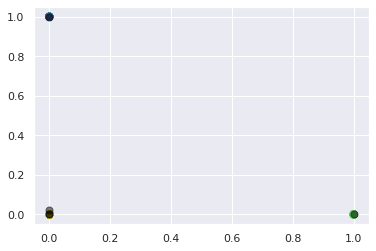

In [ ]:
plt.scatter(df_vectorized_X.toarray()[:,0], df_vectorized_X.toarray()[:,1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:,0], centers[:,1], c='black', s=50, alpha=0.5)
